<a href="https://colab.research.google.com/github/Mashood20/Portfolio_Projects/blob/main/Crypto%20data%20using%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a963496e-e965-4b1f-8f1c-f17070a7d969',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-02-25T01:21:14.826Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 10878}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11958, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd

In [4]:
df = pd.json_normalize(data['data'])

In [5]:
df['Time_stamp'] = pd.to_datetime('now')

In [6]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Time_stamp
0,1,Bitcoin,BTC,bitcoin,11958,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982867e+07,1.982867e+07,...,61.2239,1.927759e+12,None,2025-02-25T01:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-25 01:21:15.287761
1,1027,Ethereum,ETH,ethereum,9949,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205713e+08,1.205713e+08,...,10.1012,3.007507e+11,None,2025-02-25T01:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-25 01:21:15.287761
2,825,Tether USDt,USDT,tether,117747,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.423505e+11,1.445655e+11,...,4.7867,1.445280e+11,None,2025-02-25T01:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-25 01:21:15.287761
3,52,XRP,XRP,xrp,1541,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.788781e+10,9.998642e+10,...,4.4759,2.298783e+11,None,2025-02-25T01:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-25 01:21:15.287761
4,1839,BNB,BNB,bnb,2373,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424765e+08,1.424765e+08,...,2.9287,8.707140e+10,None,2025-02-25T01:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-25 01:21:15.287761


In [7]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'20',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'a963496e-e965-4b1f-8f1c-f17070a7d969',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

  df2 = pd.json_normalize(data['data'])
  df2['Time_stamp'] = pd.to_datetime('now')
  df = pd.concat([df, df2], ignore_index=True)


In [8]:
import os
from time import time
from time import sleep

for i in range(333):
  api_runner()
  print('API Runner completed')
  sleep(5) #sleep for 1 minute
exit()

{'status': {'timestamp': '2025-02-25T01:21:15.414Z', 'error_code': 0, 'error_message': None, 'elapsed': 12, 'credit_count': 1, 'notice': None, 'total_count': 10878}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11958, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'Time_stamp'],
      dtype='object')

In [17]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean()

In [19]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.01739
         quote.USD.percent_change_24h    -4.60634
         quote.USD.percent_change_7d     -4.38976
         quote.USD.percent_change_30d   -12.25526
         quote.USD.percent_change_60d    -4.01196
                                           ...   
MANTRA   quote.USD.percent_change_24h    -3.39143
         quote.USD.percent_change_7d     12.30307
         quote.USD.percent_change_30d    66.75806
         quote.USD.percent_change_60d   124.78141
         quote.USD.percent_change_90d   124.32179
Length: 120, dtype: float64

In [20]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.01739
        quote.USD.percent_change_24h  -4.60634
        quote.USD.percent_change_7d   -4.38976
        quote.USD.percent_change_30d -12.25526
        quote.USD.percent_change_60d  -4.01196
...                                        ...
MANTRA  quote.USD.percent_change_24h  -3.39143
        quote.USD.percent_change_7d   12.30307
        quote.USD.percent_change_30d  66.75806
        quote.USD.percent_change_60d 124.78141
        quote.USD.percent_change_90d 124.32179

[120 rows x 1 columns]

In [21]:
df5.count()

,0
values,120


In [29]:
index = pd.Index(range(120))

df6 = df5.reset_index()

In [30]:
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.01739
1,Bitcoin,quote.USD.percent_change_24h,-4.60634
2,Bitcoin,quote.USD.percent_change_7d,-4.38976
3,Bitcoin,quote.USD.percent_change_30d,-12.25526
4,Bitcoin,quote.USD.percent_change_60d,-4.01196
...,...,...,...
115,MANTRA,quote.USD.percent_change_24h,-3.39143
116,MANTRA,quote.USD.percent_change_7d,12.30307
117,MANTRA,quote.USD.percent_change_30d,66.75806
118,MANTRA,quote.USD.percent_change_60d,124.78141


In [49]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.01739
1,Bitcoin,quote.USD.percent_change_24h,-4.60634
2,Bitcoin,quote.USD.percent_change_7d,-4.38976
3,Bitcoin,quote.USD.percent_change_30d,-12.25526
4,Bitcoin,quote.USD.percent_change_60d,-4.01196
...,...,...,...
115,MANTRA,quote.USD.percent_change_24h,-3.39143
116,MANTRA,quote.USD.percent_change_7d,12.30307
117,MANTRA,quote.USD.percent_change_30d,66.75806
118,MANTRA,quote.USD.percent_change_60d,124.78141


In [50]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d'], ['1h','24h', '7d', '30d', '60d', '90d'])

In [51]:
df7

,name,percent_change,values
0,Bitcoin,1h,0.01739
1,Bitcoin,24h,-4.60634
2,Bitcoin,7d,-4.38976
3,Bitcoin,30d,-12.25526
4,Bitcoin,60d,-4.01196
...,...,...,...
115,MANTRA,24h,-3.39143
116,MANTRA,7d,12.30307
117,MANTRA,30d,66.75806
118,MANTRA,60d,124.78141


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

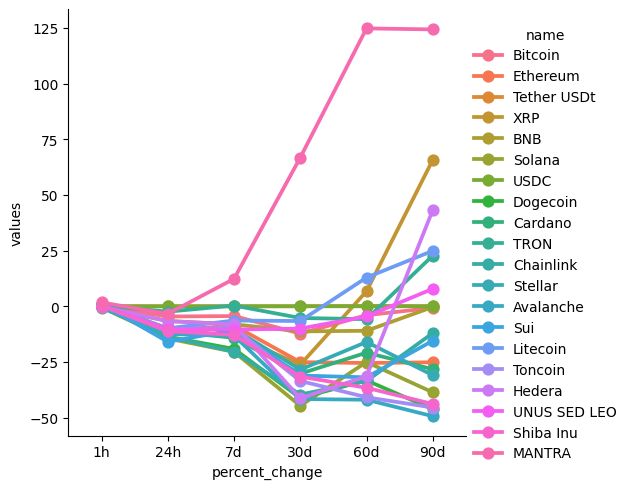

In [53]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [54]:
df10 = df[['name', 'quote.USD.price', 'Time_stamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Time_stamp
0,Bitcoin,91798.05313,2025-02-25 01:21:15.287761
20,Bitcoin,91798.05313,2025-02-25 01:21:15.437248
40,Bitcoin,91798.05313,2025-02-25 01:21:20.522364
60,Bitcoin,91798.05313,2025-02-25 01:21:25.613152
80,Bitcoin,91798.05313,2025-02-25 01:21:34.775169
100,Bitcoin,91798.05313,2025-02-25 01:21:39.872711
120,Bitcoin,91798.05313,2025-02-25 01:21:45.016005
140,Bitcoin,91798.05313,2025-02-25 01:21:50.110722
160,Bitcoin,91798.05313,2025-02-25 01:21:55.209803
180,Bitcoin,91798.05313,2025-02-25 01:22:00.305764


<Axes: xlabel='Time_stamp', ylabel='quote.USD.price'>

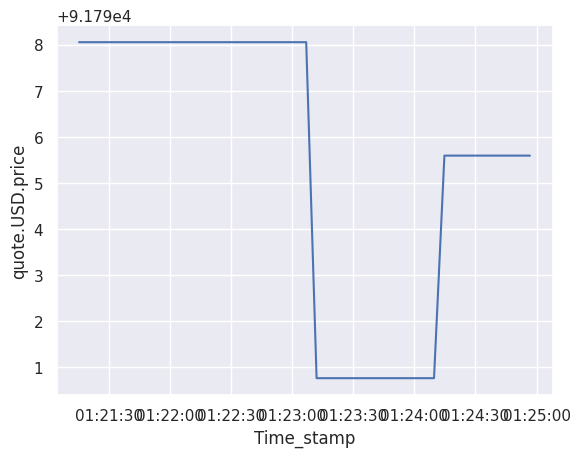

In [58]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='Time_stamp', y='quote.USD.price', data=df10)